In [1]:
import unittest
import import_ipynb
import pandas as pd
import pandas.testing as pd_testing
import tensorflow as tf

class TestExercise03_05(unittest.TestCase):
    def setUp(self):
        import Exercise03_05
        self.exercises = Exercise03_05

        self.dataset_path = tf.keras.utils.get_file("auto-mpg.data",
                                             "https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter03/Dataset/auto-mpg.data")

        self.dataset = pd.read_csv(self.dataset_path, names=['MPG','Cylinders','Displacement','Horsepower','Weight',
                             'Acceleration', 'Model Year', 'Origin'], na_values = "?", comment='\t',
                                       sep=" ", skipinitialspace=True)

        self.dataset = self.dataset.dropna()
        self.dataset['Origin'] = self.dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
        self.dataset = pd.get_dummies(self.dataset, prefix='', prefix_sep='')
        
        self.train_dataset = self.dataset.sample(frac=0.8,random_state=0)
        self.test_dataset = self.dataset.drop(self.train_dataset.index)
        
        self.train_stats = self.train_dataset.describe()
        self.train_stats.pop("MPG")
        self.train_stats = self.train_stats.transpose()
        
        self.train_labels = self.train_dataset.pop('MPG')
        self.test_labels = self.test_dataset.pop('MPG')

        self.normed_train_data = (self.train_dataset - self.train_stats['mean']) / self.train_stats['std']
        self.normed_test_data = (self.test_dataset - self.train_stats['mean']) / self.train_stats['std']

    def test_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.dataset, self.dataset)
        
    def test_train_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.train_dataset, self.train_dataset)
        
    def test_test_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.test_dataset, self.test_dataset)
    
    def test_train_labels_df(self):
        pd_testing.assert_series_equal(self.exercises.train_labels, self.train_labels)
        
    def test_test_labels_df(self):
        pd_testing.assert_series_equal(self.exercises.test_labels, self.test_labels)
        
    def test_normed_train_data_df(self):
        pd_testing.assert_frame_equal(self.exercises.normed_train_data, self.normed_train_data)
        
    def test_normed_test_data_df(self):
        pd_testing.assert_frame_equal(self.exercises.normed_test_data, self.normed_test_data)
        
    def test_mae(self):
        self.assertEqual(self.exercises.mae < 2.5, True)



test_dataset_df (__main__.TestExercise03_05) ... 

importing Jupyter notebook from Exercise03_05.ipynb
TensorFlow version: 2.1.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 1s - loss: 560.3843 - mae: 22.2936 - mse: 560.3843 - val_loss: 542.6007 - val_mae: 21.8727 - val_mse: 542.6008
Epoch 2/1000
251/251 - 0s - loss: 502.4878 - mae: 20.9828 - mse: 502.4878 - val_loss: 483.3835 - val_mae: 20.5013 - val_mse: 48

Epoch 59/1000
251/251 - 0s - loss: 6.5730 - mae: 1.8072 - mse: 6.5730 - val_loss: 8.5233 - val_mae: 2.2743 - val_mse: 8.5233
Epoch 60/1000
251/251 - 0s - loss: 6.5350 - mae: 1.7764 - mse: 6.5350 - val_loss: 8.7249 - val_mae: 2.2602 - val_mse: 8.7249
Epoch 61/1000
251/251 - 0s - loss: 6.6184 - mae: 1.7721 - mse: 6.6184 - val_loss: 8.6642 - val_mae: 2.2681 - val_mse: 8.6642
Epoch 62/1000
251/251 - 0s - loss: 6.4487 - mae: 1.7797 - mse: 6.4487 - val_loss: 8.7433 - val_mae: 2.2291 - val_mse: 8.7433
Epoch 63/1000
251/251 - 0s - loss: 6.4925 - mae: 1.7867 - mse: 6.4925 - val_loss: 8.9874 - val_mae: 2.3831 - val_mse: 8.9874
Epoch 64/1000
251/251 - 0s - loss: 6.6173 - mae: 1.8393 - mse: 6.6173 - val_loss: 8.5286 - val_mae: 2.2391 - val_mse: 8.5286
Epoch 65/1000
251/251 - 0s - loss: 6.6774 - mae: 1.8217 - mse: 6.6774 - val_loss: 8.6108 - val_mae: 2.3079 - val_mse: 8.6108
Epoch 66/1000
251/251 - 0s - loss: 6.4228 - mae: 1.7829 - mse: 6.4228 - val_loss: 8.6958 - val_mae: 2.2897 - val_mse: 8.6958


Epoch 125/1000
251/251 - 0s - loss: 5.8122 - mae: 1.6573 - mse: 5.8122 - val_loss: 8.7867 - val_mae: 2.2400 - val_mse: 8.7867
Epoch 126/1000
251/251 - 0s - loss: 5.7775 - mae: 1.6929 - mse: 5.7775 - val_loss: 8.9377 - val_mae: 2.2647 - val_mse: 8.9377
Epoch 127/1000
251/251 - 0s - loss: 5.9802 - mae: 1.6986 - mse: 5.9802 - val_loss: 8.6885 - val_mae: 2.2864 - val_mse: 8.6885
Epoch 128/1000
251/251 - 0s - loss: 5.6892 - mae: 1.6571 - mse: 5.6892 - val_loss: 8.7039 - val_mae: 2.2957 - val_mse: 8.7039
Epoch 129/1000
251/251 - 0s - loss: 5.8130 - mae: 1.6560 - mse: 5.8130 - val_loss: 8.5279 - val_mae: 2.2475 - val_mse: 8.5279
Epoch 130/1000
251/251 - 0s - loss: 5.9195 - mae: 1.7087 - mse: 5.9195 - val_loss: 8.6185 - val_mae: 2.2761 - val_mse: 8.6185
Epoch 131/1000
251/251 - 0s - loss: 5.6965 - mae: 1.6382 - mse: 5.6965 - val_loss: 8.6712 - val_mae: 2.2398 - val_mse: 8.6712
Epoch 132/1000
251/251 - 0s - loss: 5.7050 - mae: 1.6575 - mse: 5.7050 - val_loss: 8.9528 - val_mae: 2.2246 - val_mse:

251/251 - 0s - loss: 5.4541 - mae: 1.6054 - mse: 5.4541 - val_loss: 9.2013 - val_mae: 2.3120 - val_mse: 9.2013
Epoch 191/1000
251/251 - 0s - loss: 5.3576 - mae: 1.6124 - mse: 5.3576 - val_loss: 8.8105 - val_mae: 2.2906 - val_mse: 8.8105
Epoch 192/1000
251/251 - 0s - loss: 5.2166 - mae: 1.5944 - mse: 5.2166 - val_loss: 8.8989 - val_mae: 2.2851 - val_mse: 8.8989
Epoch 193/1000
251/251 - 0s - loss: 5.5685 - mae: 1.6406 - mse: 5.5685 - val_loss: 8.8393 - val_mae: 2.3363 - val_mse: 8.8393
Epoch 194/1000
251/251 - 0s - loss: 5.4987 - mae: 1.5718 - mse: 5.4987 - val_loss: 8.9314 - val_mae: 2.2879 - val_mse: 8.9314
Epoch 195/1000
251/251 - 0s - loss: 5.2756 - mae: 1.5926 - mse: 5.2756 - val_loss: 8.8372 - val_mae: 2.2729 - val_mse: 8.8372
Epoch 196/1000
251/251 - 0s - loss: 5.2992 - mae: 1.5936 - mse: 5.2992 - val_loss: 8.9923 - val_mae: 2.4055 - val_mse: 8.9923
Epoch 197/1000
251/251 - 0s - loss: 5.2872 - mae: 1.5920 - mse: 5.2872 - val_loss: 8.7661 - val_mae: 2.2899 - val_mse: 8.7661
Epoch 1

Epoch 256/1000
251/251 - 0s - loss: 5.1077 - mae: 1.5081 - mse: 5.1077 - val_loss: 8.9658 - val_mae: 2.2929 - val_mse: 8.9658
Epoch 257/1000
251/251 - 0s - loss: 5.1126 - mae: 1.5453 - mse: 5.1126 - val_loss: 9.1019 - val_mae: 2.3241 - val_mse: 9.1019
Epoch 258/1000
251/251 - 0s - loss: 4.9413 - mae: 1.5144 - mse: 4.9413 - val_loss: 9.1654 - val_mae: 2.2795 - val_mse: 9.1654
Epoch 259/1000
251/251 - 0s - loss: 4.9998 - mae: 1.5433 - mse: 4.9998 - val_loss: 9.0629 - val_mae: 2.2794 - val_mse: 9.0629
Epoch 260/1000
251/251 - 0s - loss: 4.9974 - mae: 1.5243 - mse: 4.9974 - val_loss: 9.2609 - val_mae: 2.3922 - val_mse: 9.2609
Epoch 261/1000
251/251 - 0s - loss: 5.1270 - mae: 1.5273 - mse: 5.1270 - val_loss: 9.1828 - val_mae: 2.3432 - val_mse: 9.1828
Epoch 262/1000
251/251 - 0s - loss: 4.9497 - mae: 1.5227 - mse: 4.9497 - val_loss: 9.2608 - val_mae: 2.3755 - val_mse: 9.2608
Epoch 263/1000
251/251 - 0s - loss: 4.9670 - mae: 1.5136 - mse: 4.9670 - val_loss: 9.3054 - val_mae: 2.2791 - val_mse:

Epoch 321/1000
251/251 - 0s - loss: 4.6915 - mae: 1.4525 - mse: 4.6915 - val_loss: 9.3136 - val_mae: 2.2755 - val_mse: 9.3136
Epoch 322/1000
251/251 - 0s - loss: 4.8931 - mae: 1.5097 - mse: 4.8931 - val_loss: 9.4388 - val_mae: 2.3179 - val_mse: 9.4388
Epoch 323/1000
251/251 - 0s - loss: 4.8513 - mae: 1.5014 - mse: 4.8513 - val_loss: 9.4618 - val_mae: 2.2881 - val_mse: 9.4618
Epoch 324/1000
251/251 - 0s - loss: 4.6877 - mae: 1.4617 - mse: 4.6877 - val_loss: 9.9796 - val_mae: 2.3725 - val_mse: 9.9796
Epoch 325/1000
251/251 - 0s - loss: 4.7128 - mae: 1.5035 - mse: 4.7128 - val_loss: 9.3250 - val_mae: 2.3724 - val_mse: 9.3250
Epoch 326/1000
251/251 - 0s - loss: 4.6826 - mae: 1.4623 - mse: 4.6826 - val_loss: 9.4272 - val_mae: 2.2979 - val_mse: 9.4272
Epoch 327/1000
251/251 - 0s - loss: 4.8758 - mae: 1.4995 - mse: 4.8758 - val_loss: 9.7054 - val_mae: 2.2764 - val_mse: 9.7054
Epoch 328/1000
251/251 - 0s - loss: 5.0124 - mae: 1.5360 - mse: 5.0124 - val_loss: 9.2491 - val_mae: 2.2854 - val_mse:

Epoch 386/1000
251/251 - 0s - loss: 4.4833 - mae: 1.4333 - mse: 4.4833 - val_loss: 9.6003 - val_mae: 2.4190 - val_mse: 9.6003
Epoch 387/1000
251/251 - 0s - loss: 4.7092 - mae: 1.4405 - mse: 4.7092 - val_loss: 9.7319 - val_mae: 2.3594 - val_mse: 9.7319
Epoch 388/1000
251/251 - 0s - loss: 4.8358 - mae: 1.4980 - mse: 4.8358 - val_loss: 9.3438 - val_mae: 2.3173 - val_mse: 9.3438
Epoch 389/1000
251/251 - 0s - loss: 4.5079 - mae: 1.4237 - mse: 4.5079 - val_loss: 9.4190 - val_mae: 2.3659 - val_mse: 9.4190
Epoch 390/1000
251/251 - 0s - loss: 4.5060 - mae: 1.4209 - mse: 4.5060 - val_loss: 9.4879 - val_mae: 2.3541 - val_mse: 9.4879
Epoch 391/1000
251/251 - 0s - loss: 4.6271 - mae: 1.4327 - mse: 4.6271 - val_loss: 9.3989 - val_mae: 2.2982 - val_mse: 9.3989
Epoch 392/1000
251/251 - 0s - loss: 4.5859 - mae: 1.4397 - mse: 4.5859 - val_loss: 9.3950 - val_mae: 2.3333 - val_mse: 9.3950
Epoch 393/1000
251/251 - 0s - loss: 4.5060 - mae: 1.4313 - mse: 4.5060 - val_loss: 9.4398 - val_mae: 2.3279 - val_mse:

Epoch 451/1000
251/251 - 0s - loss: 4.5148 - mae: 1.4215 - mse: 4.5148 - val_loss: 10.0691 - val_mae: 2.3452 - val_mse: 10.0691
Epoch 452/1000
251/251 - 0s - loss: 4.3108 - mae: 1.4129 - mse: 4.3108 - val_loss: 9.3848 - val_mae: 2.3622 - val_mse: 9.3848
Epoch 453/1000
251/251 - 0s - loss: 4.4119 - mae: 1.3941 - mse: 4.4119 - val_loss: 9.9176 - val_mae: 2.4117 - val_mse: 9.9176
Epoch 454/1000
251/251 - 0s - loss: 4.3564 - mae: 1.4053 - mse: 4.3564 - val_loss: 9.9229 - val_mae: 2.3226 - val_mse: 9.9229
Epoch 455/1000
251/251 - 0s - loss: 4.4327 - mae: 1.3937 - mse: 4.4327 - val_loss: 10.7531 - val_mae: 2.3922 - val_mse: 10.7531
Epoch 456/1000
251/251 - 0s - loss: 4.4582 - mae: 1.4338 - mse: 4.4582 - val_loss: 10.0215 - val_mae: 2.5010 - val_mse: 10.0215
Epoch 457/1000
251/251 - 0s - loss: 4.3916 - mae: 1.3959 - mse: 4.3916 - val_loss: 9.6887 - val_mae: 2.3485 - val_mse: 9.6887
Epoch 458/1000
251/251 - 0s - loss: 4.2394 - mae: 1.3698 - mse: 4.2394 - val_loss: 9.7196 - val_mae: 2.3380 - va

Epoch 516/1000
251/251 - 0s - loss: 4.0583 - mae: 1.3132 - mse: 4.0583 - val_loss: 11.3363 - val_mae: 2.4190 - val_mse: 11.3363
Epoch 517/1000
251/251 - 0s - loss: 4.2515 - mae: 1.4221 - mse: 4.2515 - val_loss: 10.1697 - val_mae: 2.4512 - val_mse: 10.1697
Epoch 518/1000
251/251 - 0s - loss: 4.2749 - mae: 1.3455 - mse: 4.2749 - val_loss: 10.0621 - val_mae: 2.4186 - val_mse: 10.0621
Epoch 519/1000
251/251 - 0s - loss: 4.2078 - mae: 1.3706 - mse: 4.2078 - val_loss: 9.9143 - val_mae: 2.4525 - val_mse: 9.9143
Epoch 520/1000
251/251 - 0s - loss: 4.1808 - mae: 1.3714 - mse: 4.1808 - val_loss: 9.5943 - val_mae: 2.3401 - val_mse: 9.5943
Epoch 521/1000
251/251 - 0s - loss: 4.1487 - mae: 1.3417 - mse: 4.1487 - val_loss: 11.1143 - val_mae: 2.4853 - val_mse: 11.1143
Epoch 522/1000
251/251 - 0s - loss: 4.3177 - mae: 1.4159 - mse: 4.3177 - val_loss: 9.9568 - val_mae: 2.4115 - val_mse: 9.9568
Epoch 523/1000
251/251 - 0s - loss: 4.0889 - mae: 1.3401 - mse: 4.0889 - val_loss: 9.7160 - val_mae: 2.3984 - 

Epoch 581/1000
251/251 - 0s - loss: 3.8813 - mae: 1.3097 - mse: 3.8813 - val_loss: 10.2010 - val_mae: 2.4150 - val_mse: 10.2010
Epoch 582/1000
251/251 - 0s - loss: 4.1914 - mae: 1.3503 - mse: 4.1914 - val_loss: 9.8246 - val_mae: 2.3217 - val_mse: 9.8246
Epoch 583/1000
251/251 - 0s - loss: 3.8637 - mae: 1.3106 - mse: 3.8637 - val_loss: 9.8475 - val_mae: 2.4303 - val_mse: 9.8475
Epoch 584/1000
251/251 - 0s - loss: 4.0807 - mae: 1.3286 - mse: 4.0807 - val_loss: 9.8818 - val_mae: 2.4588 - val_mse: 9.8818
Epoch 585/1000
251/251 - 0s - loss: 3.9177 - mae: 1.2847 - mse: 3.9177 - val_loss: 10.3166 - val_mae: 2.3357 - val_mse: 10.3166
Epoch 586/1000
251/251 - 0s - loss: 3.9405 - mae: 1.3814 - mse: 3.9405 - val_loss: 9.7042 - val_mae: 2.4044 - val_mse: 9.7042
Epoch 587/1000
251/251 - 0s - loss: 4.0356 - mae: 1.2867 - mse: 4.0356 - val_loss: 10.2619 - val_mae: 2.4178 - val_mse: 10.2619
Epoch 588/1000
251/251 - 0s - loss: 3.9527 - mae: 1.2988 - mse: 3.9527 - val_loss: 9.8845 - val_mae: 2.3854 - va

Epoch 646/1000
251/251 - 0s - loss: 3.6983 - mae: 1.2454 - mse: 3.6983 - val_loss: 9.5280 - val_mae: 2.3163 - val_mse: 9.5280
Epoch 647/1000
251/251 - 0s - loss: 3.8533 - mae: 1.2964 - mse: 3.8533 - val_loss: 9.7168 - val_mae: 2.4394 - val_mse: 9.7168
Epoch 648/1000
251/251 - 0s - loss: 3.9903 - mae: 1.3110 - mse: 3.9903 - val_loss: 9.9620 - val_mae: 2.3838 - val_mse: 9.9620
Epoch 649/1000
251/251 - 0s - loss: 3.6912 - mae: 1.2380 - mse: 3.6912 - val_loss: 10.1545 - val_mae: 2.3208 - val_mse: 10.1545
Epoch 650/1000
251/251 - 0s - loss: 4.0003 - mae: 1.3037 - mse: 4.0003 - val_loss: 9.8232 - val_mae: 2.3327 - val_mse: 9.8232
Epoch 651/1000
251/251 - 0s - loss: 3.6549 - mae: 1.2526 - mse: 3.6549 - val_loss: 10.0284 - val_mae: 2.4611 - val_mse: 10.0284
Epoch 652/1000
251/251 - 0s - loss: 3.8260 - mae: 1.2516 - mse: 3.8260 - val_loss: 9.6204 - val_mae: 2.2909 - val_mse: 9.6204
Epoch 653/1000
251/251 - 0s - loss: 3.7942 - mae: 1.2609 - mse: 3.7942 - val_loss: 9.6470 - val_mae: 2.4125 - val_

Epoch 711/1000
251/251 - 0s - loss: 3.8545 - mae: 1.2589 - mse: 3.8545 - val_loss: 9.9472 - val_mae: 2.3166 - val_mse: 9.9472
Epoch 712/1000
251/251 - 0s - loss: 3.8999 - mae: 1.2420 - mse: 3.8999 - val_loss: 9.4097 - val_mae: 2.3615 - val_mse: 9.4097
Epoch 713/1000
251/251 - 0s - loss: 3.4656 - mae: 1.1959 - mse: 3.4656 - val_loss: 9.8015 - val_mae: 2.3523 - val_mse: 9.8015
Epoch 714/1000
251/251 - 0s - loss: 3.6607 - mae: 1.2578 - mse: 3.6607 - val_loss: 9.9579 - val_mae: 2.3362 - val_mse: 9.9579
Epoch 715/1000
251/251 - 0s - loss: 3.6912 - mae: 1.2737 - mse: 3.6912 - val_loss: 9.7115 - val_mae: 2.4155 - val_mse: 9.7115
Epoch 716/1000
251/251 - 0s - loss: 3.7248 - mae: 1.2457 - mse: 3.7248 - val_loss: 9.3529 - val_mae: 2.3477 - val_mse: 9.3529
Epoch 717/1000
251/251 - 0s - loss: 3.6136 - mae: 1.2321 - mse: 3.6136 - val_loss: 9.4275 - val_mae: 2.3568 - val_mse: 9.4275
Epoch 718/1000
251/251 - 0s - loss: 3.6532 - mae: 1.2453 - mse: 3.6532 - val_loss: 10.1731 - val_mae: 2.4811 - val_mse

Epoch 776/1000
251/251 - 0s - loss: 3.4406 - mae: 1.2044 - mse: 3.4406 - val_loss: 9.4963 - val_mae: 2.3186 - val_mse: 9.4963
Epoch 777/1000
251/251 - 0s - loss: 3.3638 - mae: 1.1807 - mse: 3.3638 - val_loss: 9.4207 - val_mae: 2.3819 - val_mse: 9.4207
Epoch 778/1000
251/251 - 0s - loss: 3.5494 - mae: 1.2452 - mse: 3.5494 - val_loss: 8.9553 - val_mae: 2.2724 - val_mse: 8.9553
Epoch 779/1000
251/251 - 0s - loss: 3.4721 - mae: 1.1934 - mse: 3.4721 - val_loss: 9.0220 - val_mae: 2.3073 - val_mse: 9.0220
Epoch 780/1000
251/251 - 0s - loss: 3.5079 - mae: 1.2174 - mse: 3.5079 - val_loss: 9.9722 - val_mae: 2.5329 - val_mse: 9.9722
Epoch 781/1000
251/251 - 0s - loss: 3.4101 - mae: 1.2066 - mse: 3.4101 - val_loss: 8.8988 - val_mae: 2.2863 - val_mse: 8.8988
Epoch 782/1000
251/251 - 0s - loss: 3.3938 - mae: 1.1666 - mse: 3.3938 - val_loss: 9.9987 - val_mae: 2.3214 - val_mse: 9.9987
Epoch 783/1000
251/251 - 0s - loss: 3.4418 - mae: 1.1803 - mse: 3.4418 - val_loss: 9.5613 - val_mae: 2.3272 - val_mse:

251/251 - 0s - loss: 3.3021 - mae: 1.1544 - mse: 3.3021 - val_loss: 9.3820 - val_mae: 2.3618 - val_mse: 9.3820
Epoch 842/1000
251/251 - 0s - loss: 3.4881 - mae: 1.2008 - mse: 3.4881 - val_loss: 9.2038 - val_mae: 2.3517 - val_mse: 9.2038
Epoch 843/1000
251/251 - 0s - loss: 3.1302 - mae: 1.0896 - mse: 3.1302 - val_loss: 9.8076 - val_mae: 2.3380 - val_mse: 9.8076
Epoch 844/1000
251/251 - 0s - loss: 3.4141 - mae: 1.1961 - mse: 3.4141 - val_loss: 9.3313 - val_mae: 2.3768 - val_mse: 9.3313
Epoch 845/1000
251/251 - 0s - loss: 3.4149 - mae: 1.1268 - mse: 3.4149 - val_loss: 9.7922 - val_mae: 2.3762 - val_mse: 9.7922
Epoch 846/1000
251/251 - 0s - loss: 3.2663 - mae: 1.1631 - mse: 3.2663 - val_loss: 9.7119 - val_mae: 2.3238 - val_mse: 9.7119
Epoch 847/1000
251/251 - 0s - loss: 3.2679 - mae: 1.1646 - mse: 3.2679 - val_loss: 9.7308 - val_mae: 2.4222 - val_mse: 9.7308
Epoch 848/1000
251/251 - 0s - loss: 3.2955 - mae: 1.1364 - mse: 3.2955 - val_loss: 9.1572 - val_mae: 2.2894 - val_mse: 9.1572
Epoch 8

251/251 - 0s - loss: 3.2523 - mae: 1.1183 - mse: 3.2523 - val_loss: 8.9884 - val_mae: 2.3196 - val_mse: 8.9884
Epoch 907/1000
251/251 - 0s - loss: 3.1914 - mae: 1.0802 - mse: 3.1914 - val_loss: 9.7410 - val_mae: 2.4185 - val_mse: 9.7410
Epoch 908/1000
251/251 - 0s - loss: 3.2544 - mae: 1.0937 - mse: 3.2544 - val_loss: 9.2432 - val_mae: 2.2648 - val_mse: 9.2432
Epoch 909/1000
251/251 - 0s - loss: 3.2771 - mae: 1.1712 - mse: 3.2771 - val_loss: 9.2921 - val_mae: 2.3665 - val_mse: 9.2921
Epoch 910/1000
251/251 - 0s - loss: 3.1245 - mae: 1.0969 - mse: 3.1245 - val_loss: 8.9178 - val_mae: 2.2831 - val_mse: 8.9178
Epoch 911/1000
251/251 - 0s - loss: 3.0458 - mae: 1.0774 - mse: 3.0458 - val_loss: 9.3806 - val_mae: 2.3885 - val_mse: 9.3806
Epoch 912/1000
251/251 - 0s - loss: 3.2783 - mae: 1.1766 - mse: 3.2783 - val_loss: 8.9490 - val_mae: 2.3086 - val_mse: 8.9490
Epoch 913/1000
251/251 - 0s - loss: 3.0654 - mae: 1.0623 - mse: 3.0654 - val_loss: 9.1550 - val_mae: 2.3563 - val_mse: 9.1550
Epoch 9

251/251 - 0s - loss: 2.8875 - mae: 1.0337 - mse: 2.8875 - val_loss: 9.1274 - val_mae: 2.2734 - val_mse: 9.1274
Epoch 972/1000
251/251 - 0s - loss: 3.0574 - mae: 1.0956 - mse: 3.0574 - val_loss: 8.9673 - val_mae: 2.3038 - val_mse: 8.9673
Epoch 973/1000
251/251 - 0s - loss: 2.9506 - mae: 1.0352 - mse: 2.9506 - val_loss: 9.3814 - val_mae: 2.3607 - val_mse: 9.3814
Epoch 974/1000
251/251 - 0s - loss: 2.8930 - mae: 1.0537 - mse: 2.8930 - val_loss: 9.0930 - val_mae: 2.3382 - val_mse: 9.0930
Epoch 975/1000
251/251 - 0s - loss: 2.9450 - mae: 1.0684 - mse: 2.9450 - val_loss: 9.1934 - val_mae: 2.3465 - val_mse: 9.1934
Epoch 976/1000
251/251 - 0s - loss: 2.9240 - mae: 1.0518 - mse: 2.9240 - val_loss: 9.1430 - val_mae: 2.2769 - val_mse: 9.1430
Epoch 977/1000
251/251 - 0s - loss: 3.0533 - mae: 1.0951 - mse: 3.0533 - val_loss: 9.1623 - val_mae: 2.3315 - val_mse: 9.1623
Epoch 978/1000
251/251 - 0s - loss: 3.0348 - mae: 1.0896 - mse: 3.0348 - val_loss: 8.9646 - val_mae: 2.2741 - val_mse: 8.9646
Epoch 9

Epoch 35/1000
251/251 - 0s - loss: 7.4755 - mae: 1.9638 - mse: 7.4755 - val_loss: 9.2645 - val_mae: 2.3503 - val_mse: 9.2645
Epoch 36/1000
251/251 - 0s - loss: 7.6115 - mae: 1.9890 - mse: 7.6115 - val_loss: 9.0349 - val_mae: 2.2520 - val_mse: 9.0349
Epoch 37/1000
251/251 - 0s - loss: 7.4180 - mae: 1.9506 - mse: 7.4180 - val_loss: 9.0469 - val_mae: 2.2410 - val_mse: 9.0469
Epoch 38/1000
251/251 - 0s - loss: 7.3399 - mae: 1.9305 - mse: 7.3399 - val_loss: 8.9347 - val_mae: 2.2770 - val_mse: 8.9347
Epoch 39/1000
251/251 - 0s - loss: 7.3252 - mae: 1.9141 - mse: 7.3252 - val_loss: 8.8775 - val_mae: 2.2577 - val_mse: 8.8775
Epoch 40/1000
251/251 - 0s - loss: 7.3036 - mae: 1.9353 - mse: 7.3036 - val_loss: 9.4739 - val_mae: 2.2933 - val_mse: 9.4739
Epoch 41/1000
251/251 - 0s - loss: 7.1198 - mae: 1.9170 - mse: 7.1198 - val_loss: 9.1041 - val_mae: 2.2702 - val_mse: 9.1041
Epoch 42/1000
251/251 - 0s - loss: 7.1140 - mae: 1.8858 - mse: 7.1140 - val_loss: 9.2140 - val_mae: 2.2890 - val_mse: 9.2140


ok
test_mae (__main__.TestExercise03_05) ... ok
test_normed_test_data_df (__main__.TestExercise03_05) ... ok
test_normed_train_data_df (__main__.TestExercise03_05) ... ok
test_test_dataset_df (__main__.TestExercise03_05) ... ok
test_test_labels_df (__main__.TestExercise03_05) ... ok
test_train_dataset_df (__main__.TestExercise03_05) ... ok
test_train_labels_df (__main__.TestExercise03_05) ... ok

----------------------------------------------------------------------
Ran 8 tests in 320.969s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

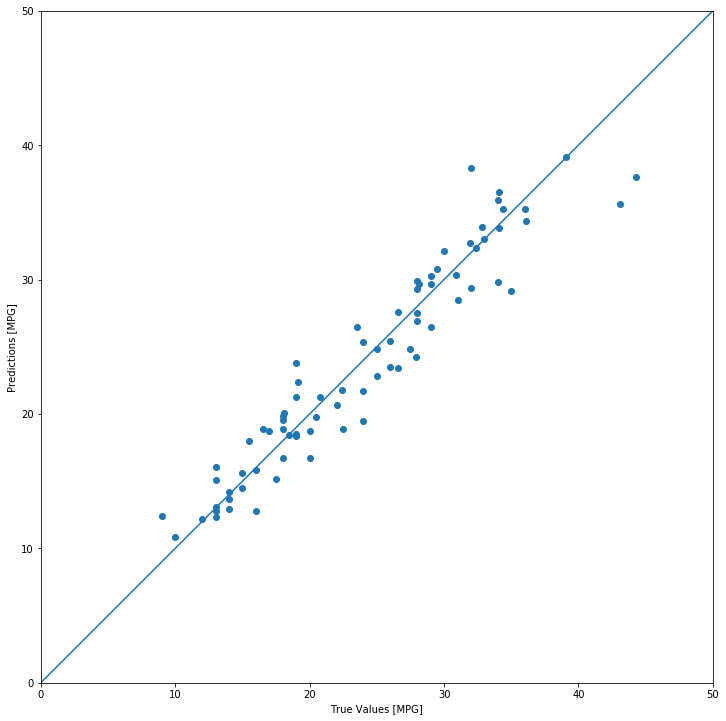

In [2]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestExercise03_05)
unittest.TextTestRunner(verbosity=2).run(suite)